Text(0.5, 0, 'Time')

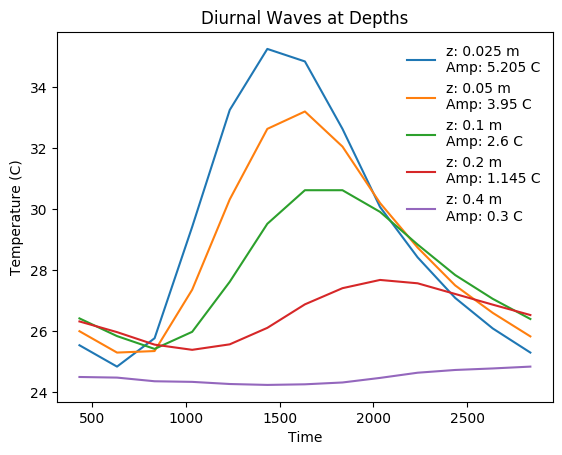

In [6]:
# Import statements
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create arrays with soil depth, times, and temps
depths = [0.025, 0.05, 0.10, 0.20, 0.40] # in meters
depths = np.array(depths)

# times are in hours:minutes format
times = np.array([435, 635, 835, 1035, 1235, 1435, 1635, 
                 1835, 2035, 2235, 2435, 2635, 2835])


# temps are in degrees C
temps = [[25.54, 26.00, 26.42, 26.32, 24.50],
         [24.84, 25.30, 25.84, 25.97, 24.48],
         [25.77, 25.35, 25.42, 25.56, 24.36],
         [29.42, 27.36, 25.98, 25.39, 24.34],
         [33.25, 30.32, 27.62, 25.57, 24.27],
         [35.25, 32.63, 29.52, 26.11, 24.24], 
         [34.84, 33.20, 30.62, 26.88, 24.26],
         [32.63, 32.05, 30.62, 27.41, 24.32],
         [30.07, 30.20, 29.91, 27.68, 24.47],
         [28.42, 28.74, 28.84, 27.57, 24.64],
         [27.09, 27.50, 27.84, 27.22, 24.73],
         [26.09, 26.60, 27.06, 26.87, 24.78],
         [25.30, 25.83, 26.40, 26.53, 24.84]]

# take transpose of temp array (this is just easier for me to work with in my head)
temps = np.array(temps).T

amplitudes_by_depth = []
for i, DiurnalCycleTemp in enumerate(temps):
    # Amplitudes are diurnal range divided by 2
    amplitude = (np.nanmax(DiurnalCycleTemp) - np.nanmin(DiurnalCycleTemp))/2
    
    # save amplitude data
    amplitudes_by_depth.append(amplitude)

    # plot the diurnal wave for a given depth
    plt.plot(times, DiurnalCycleTemp, label='z: '+ str(depths[i])+' m\nAmp: '+ str(np.around(amplitude, 3)) + ' C')

# add the legend, title, and label axes
plt.legend(frameon=False)
plt.title('Diurnal Waves at Depths')
plt.ylabel('Temperature (C)')
plt.xlabel('Time')

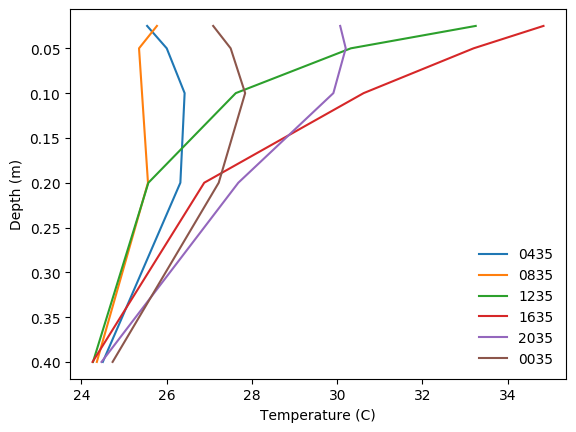

In [3]:
plt.plot(temps[:,0], depths, label='0435')
plt.plot(temps[:,2], depths, label='0835')
plt.plot(temps[:,4], depths, label='1235')
plt.plot(temps[:,6], depths, label='1635')
plt.plot(temps[:,8], depths, label='2035')
plt.plot(temps[:,10], depths, label='0035')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature (C)')
plt.legend(frameon=False)
plt.gca().invert_yaxis()



### We will first calculate damping depth and thermal diffusivity from the amplitudes

# $A$= $A_{s}$ $e^{\frac{-z}{d}}$ $\rightarrow$ ln(A) = ln($A_{s}$) + $\frac{-z}{d}$ 

Damping Depth:  0.13283362088342737
Alpha:  6.415819726365887e-07
Surface Amplitude:  5.7484426229862065


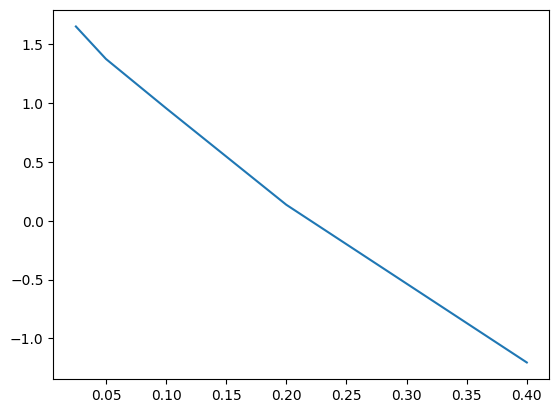

In [7]:
import scipy.stats as stats

period = 24*60*60 # period of day in seconds

# log of amplitudes and depths are linearly proportional
log_amplitudes = np.log(amplitudes_by_depth)
plt.plot(depths, log_amplitudes)
linear_regression = stats.linregress(depths, log_amplitudes)

# y intercept is log of amplitude at surface
y_intercept = linear_regression[1] 
surface_amplitude = np.exp(y_intercept)

# slope is related to the inverse of the damping coefficient, which is related to alpha
slope = stats.linregress(depths, log_amplitudes)[0]
damping_depth = -1/slope
alpha = (np.pi*(damping_depth**2))/period


print('Damping Depth: ', damping_depth)
print('Alpha: ', alpha)
print('Surface Amplitude: ', surface_amplitude)

### Next, we find damping depth and thermal diffusivity from time lag

#                                                               Time lag = $\frac{P}{2 \pi d}$ z

Damping Depth:  0.10509876715417467
Alpha:  4.016348350319791e-07
Time of Tmax at surface:  13.75


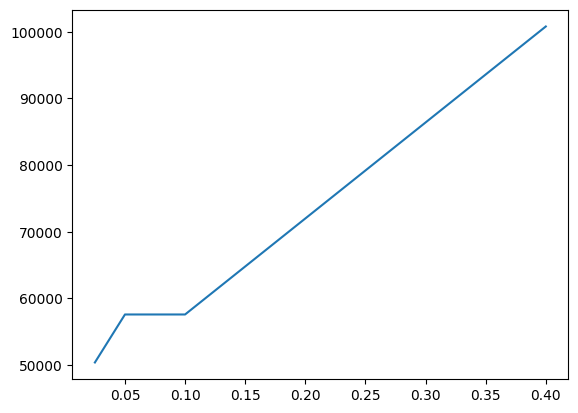

In [5]:
"""
The question frames this problem using 'time lag'. Instead of doing time lag, I just use time given in problem,
the concept is the same, just that time lag is shifted to be relative to surface. Basically, this answer is
just off by some constant. 
"""

times_of_maxes = []
for i, DiurnalCycleTemp in enumerate(temps):
    # need to find time of max temperature
    time_of_max = times[np.nanargmax(DiurnalCycleTemp)]
    times_of_maxes.append(time_of_max)
times_of_maxes = np.array(times_of_maxes)
plt.plot(depths, times_of_maxes)

# we want to linearly relate lagged temp to depth
linear_regression = stats.linregress(depths, times_of_maxes)

slope = linear_regression[0]
damping_depth = period/(2*np.pi*slope)
alpha = (np.pi*(damping_depth**2))/period
print('Damping Depth: ', damping_depth)
print('Alpha: ', alpha)
print('Time of Tmax at surface: ', (linear_regression[1]+ 35*60)/(60*60))
